In [12]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(".."))
from module.encoder import MyEncoder
df = pd.read_csv('../../Datas/iM_data.csv', encoding='cp949')

In [18]:
df_건설 = df[df['업종_대분류'] == '건설업'] 

In [20]:
df_건설

,기준년월,업종_대분류,업종_중분류,사업장_시도,사업장_시군구,법인_고객등급,전담고객여부,요구불예금잔액,거치식예금잔액,적립식예금잔액,...,여신_시설자금대출좌수,신용카드개수,외환_수출실적거래건수,외환_수입실적거래건수,창구거래건수,인터넷뱅킹거래건수,스마트뱅킹거래건수,폰뱅킹거래건수,ATM거래건수,자동이체거래건수
0,202412,건설업,종합 건설업,대구광역시,서구,일반,N,0.16,0.0,0.0,...,0개,10개초과 20개이하,0건,0건,0건,0건,2건초과 5건이하,0건,0건,10건초과 20건이하
1,202412,건설업,종합 건설업,대구광역시,서구,일반,N,0.03,0.0,0.0,...,0개,0개,0건,0건,0건,0건,0건,0건,0건,0건
2,202412,건설업,종합 건설업,대전광역시,서구,우수,N,0.24,0.0,0.0,...,0개,5개초과 10개이하,0건,0건,0건,50건 초과,0건,0건,0건,20건초과 30건이하
3,202412,건설업,종합 건설업,대구광역시,서구,우수,Y,180.00,0.0,0.0,...,0개,0개,0건,0건,2건초과 5건이하,20건초과 30건이하,0건,0건,0건,5건초과 10건이하
4,202412,건설업,종합 건설업,대구광역시,서구,우수,Y,41.00,0.0,0.0,...,0개,5개초과 10개이하,0건,0건,1건,10건초과 20건이하,0건,0건,0건,20건초과 30건이하
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347193,202203,건설업,종합 건설업,경상북도,김천시,일반,N,1.30,0.0,0.0,...,0개,1개,0건,0건,0건,5건초과 10건이하,0건,0건,0건,2건초과 5건이하
347199,202203,건설업,전문직별 공사업,대구광역시,동구,최우수,N,270.00,0.0,0.0,...,0개,2개초과 5개이하,0건,0건,1건,50건 초과,2건초과 5건이하,0건,1건,10건초과 20건이하
347227,202203,건설업,전문직별 공사업,경상북도,성주군,일반,N,0.10,0.0,0.0,...,0개,0개,0건,0건,0건,0건,0건,0건,0건,10건초과 20건이하
347258,202203,건설업,전문직별 공사업,울산광역시,남구,일반,N,0.61,0.0,0.0,...,0개,1개,0건,0건,0건,0건,0건,0건,0건,2건초과 5건이하


In [22]:
df_대출한_건설 = df_건설[df_건설['여신_시설자금대출좌수'] != '0개']

In [24]:
df_대출한_건설.columns

Index(['기준년월', '업종_대분류', '업종_중분류', '사업장_시도', '사업장_시군구', '법인_고객등급', '전담고객여부',
       '요구불예금잔액', '거치식예금잔액', '적립식예금잔액', '수익증권잔액', '신탁잔액', '퇴직연금잔액', '여신한도금액',
       '여신_운전자금대출잔액', '여신_시설자금대출잔액', '외환_수출실적금액', '외환_수입실적금액', '신용카드사용금액',
       '체크카드사용금액', '창구거래금액', '인터넷뱅킹거래금액', '스마트뱅킹거래금액', '폰뱅킹거래금액', 'ATM거래금액',
       '자동이체금액', '요구불입금금액', '요구불출금금액', '요구불예금좌수', '거치식예금좌수', '적립식예금좌수',
       '수익증권좌수', '신탁좌수', '퇴직연금좌수', '여신_운전자금대출좌수', '여신_시설자금대출좌수', '신용카드개수',
       '외환_수출실적거래건수', '외환_수입실적거래건수', '창구거래건수', '인터넷뱅킹거래건수', '스마트뱅킹거래건수',
       '폰뱅킹거래건수', 'ATM거래건수', '자동이체거래건수'],
      dtype='object')

In [29]:
df_대출한_건설_잔액 = df_대출한_건설[['업종_중분류','요구불예금잔액', '거치식예금잔액', '적립식예금잔액', '수익증권잔액']]

In [30]:
df_mean = df_대출한_건설_잔액.groupby('업종_중분류').mean()

In [31]:
df_mean

,요구불예금잔액,거치식예금잔액,적립식예금잔액,수익증권잔액
업종_중분류,,,,
전문직별 공사업,197.027032,4.316082,0.963816,0.594598
종합 건설업,194.172562,28.958551,0.188200,1.738936


In [32]:
df_sum = df_대출한_건설_잔액.groupby('업종_중분류').sum()

In [33]:
df_sum

,요구불예금잔액,거치식예금잔액,적립식예금잔액,수익증권잔액
업종_중분류,,,,
전문직별 공사업,1078131.92,23617.6,5274.0,3253.64
종합 건설업,519994.12,77551.0,504.0,4656.87


In [34]:
len(df[df['업종_중분류'] == '전문직별 공사업'])

32015

In [35]:
len(df[df['업종_중분류'] == '종합 건설업'])

19243

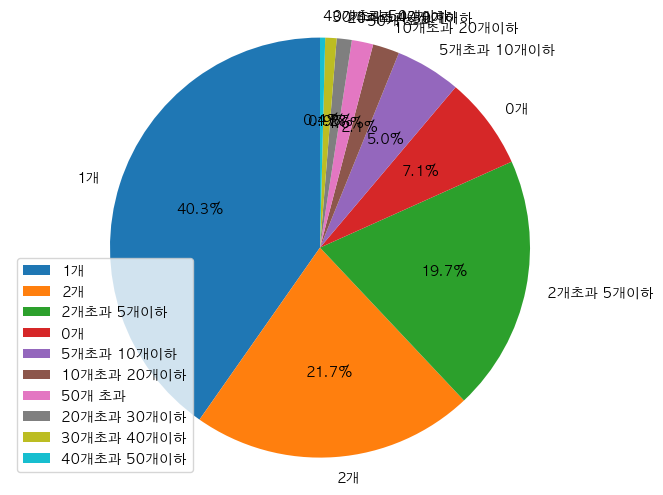

In [40]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

# 예시: 특정 업종_중분류 값
target_subtype = "종합 건설업"

# 해당 업종만 필터링
filtered_df = df[df['업종_중분류'] == target_subtype]

# 여신_시설자금대출좌수 값의 분포 집계
loan_dist = filtered_df['여신_운전자금대출좌수'].value_counts().sort_values(ascending=False)

# 파이차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(
    loan_dist.values,
    labels=loan_dist.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.axis('equal')  # 원형 유지
plt.legend()
plt.show()
